<a href="https://colab.research.google.com/github/Finger228/autoencoder-image-compression/blob/master/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from matplotlib.image import imread
import matplotlib.pyplot as plt
import imageio
import math

from google.colab import files

Using TensorFlow backend.


In [2]:
# uploaded = files.upload()

In [0]:
def getRGB(rgb_img, size):
    r = []
    g = []
    b = []
    for y in range(size[1]):
        for x in range(size[0]):
            current_r, current_g, current_b = rgb_img.getpixel((x, y))
            r.append(current_r)
            g.append(current_g)
            b.append(current_b)

    return r, g, b

In [0]:
def setRGB(rgb, size):
    num_pixels = size[0] * size[1]
    r = []
    g = []
    b = []
    for i in range(num_pixels * 3):
        if i < num_pixels:
            r.append(rgb[i])
        elif i < num_pixels * 2:
            g.append(rgb[i])
        else:
            b.append(rgb[i])
    tmp_img = Image.new('RGB', size)
    for y in range(size[1]):
        for x in range(size[0]):
            current_r = r[x + (y * size[0])]
            current_g = g[x + (y * size[0])]
            current_b = b[x + (y * size[0])]
            tmp_img.putpixel((x,y ), (current_r, current_g, current_b))

    return tmp_img


In [0]:
def transform(img):
#     img_x = img.resize([70, 70])
    img_x = img
    size_x = img.size

    r, g, b = getRGB(img_x, size_x)
    rg = np.hstack((r, g))
    rgb = np.hstack((rg, b))  
    # input_x = (2 * rgb / 255) - 1
    input_x = rgb / 255
    # input_x = np.vstack((input_x, (2 * rgb / 255) - 1))
    input_x = np.vstack((input_x, rgb / 255))

    img_y = img.resize([math.ceil(h/n), math.ceil(w/m)])
    size_y = img_y.size

    r, g, b = getRGB(img_y, size_y)
    rg = np.hstack((r, g))
    rgb = np.hstack((rg, b))  
    # output_y = (2 * rgb / 255) - 1
    output_y = (rgb / 255)
    output_y = np.vstack((output_y, rgb / 255))
    # output_y = np.vstack((output_y, (2 * rgb / 255) - 1))
    train_x.append(input_x)
    train_y.append(output_y)
    
    return 

In [0]:
images = []
# images.append(Image.open('pepega.jpg'))
# images.append(Image.open('pepehands.jpg'))
# images.append(Image.open('monkas.png'))
# images.append(Image.open('samolet.jpg'))
# images.append(Image.open('test.png'))

images.append(Image.open('test.png'))
images.append(Image.open('test2.png'))

img = images[0]
# img = img.resize([70, 70])
size = img.size
w = size[0]
h = size[1]
n = 4
m = 4
L = (math.ceil(h/n) * math.ceil(w/m))

# img_x = images[0].resize([70, 70])
size_x = images[0].size

img_y = images[0].resize([math.ceil(h/n), math.ceil(w/m)])
size_y = img_y.size

train_x = []
train_y = []

# for i in range (len(images)):
transform(images[0])

dim_x = train_x[0].shape[1]
dim_y = train_y[0].shape[1]




In [7]:
model_first = Sequential()
model_first.add(Dense(dim_y, activation='sigmoid', input_dim=dim_x))
# model_first.add(Dense(dim_x, activation='sigmoid'))
model_first.compile(optimizer='adam', loss='binary_crossentropy')

model_second = Sequential()
model_second.add(Dense(dim_x, activation='sigmoid', input_dim=dim_y))
# model_second.add(Dense(dim_x, activation='sigmoid'))
model_second.compile(optimizer='adam', loss='binary_crossentropy')

model_first.fit(train_x[0], train_y[0], epochs=10, batch_size=1)
model_second.fit(train_y[0], train_x[0], epochs=10, batch_size=1)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
2/2 [==============================] - 2s 919ms/step - loss: 1.1096
Epoch 2/10
2/2 [==============================] - 0s 22ms/step - loss: 0.9721
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 0.9430
Epoch 4/10
2/2 [==============================] - 0s 22ms/step - loss: 0.7697
Epoch 5/10
2/2 [==============================] - 0s 21ms/step - loss: 0.7100
Epoch 6/10
2/2 [==============================] - 0s 22ms/step - loss: 0.6407
Epoch 7/10
2/2 [==============================] - 0s 20ms/step - loss: 0.5897
Epoch 8/10
2/2 [==============================] - 0s 20ms/step - loss: 0.5596
Epoch 9/10
2/2 [==============================] - 0s 19ms/step - loss: 0.5551
Epoch 10/10
2/2 [==============================] - 0s 19ms/step - loss: 0.5112
Epoch 1/10
2/2 [==============================] - 0s 204ms/step - loss: 0.6302
Epoch 2/10
2/2 [=======================

In [8]:
print(train_y[0].size)

1944


In [0]:
pred_first = model_first.predict(train_x[0])    
pred_first_rgb = pred_first[0]
pred_first_rgb = pred_first_rgb * 255
new_img_first = setRGB(pred_first_rgb, size_y)

pred_second = model_second.predict(train_y[0])    
pred_second_rgb = pred_second[0]
pred_second_rgb = pred_second_rgb * 255
new_img_second = setRGB(pred_second_rgb, size_x)

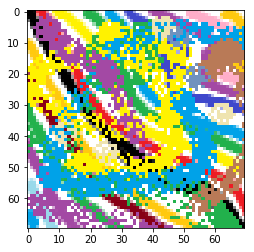

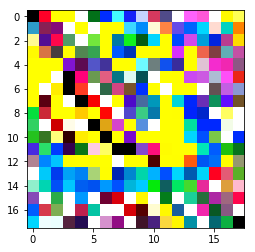

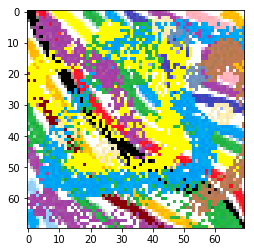

In [10]:
plt.imshow(images[0])
plt.show()
plt.imshow(new_img_first)
plt.show()
plt.imshow(new_img_second)
plt.show()